# Decision Tree Regressor

In [5]:
#Boston Housing Dataset: Load the boston dataset.
from sklearn.datasets import load_boston
boston = load_boston()

#Creating feature and target arrays
X, y = boston.data, boston.target
columns = boston.feature_names


import pandas as pd

df_boston = pd.DataFrame(X,columns=boston.feature_names)
df_boston['target'] = y


In [6]:
columns

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [7]:
#Predicting house value from a single feature
X_lstat = df_boston[['LSTAT']]
y = df_boston[['target']]

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_lstat,y,
                                                    test_size=0.3,
                                                    random_state=42)

#DEFINE YOUR REGRESSOR and THE PARAMETERS GRID
from sklearn.tree import DecisionTreeRegressor 
import numpy as np

regressor = DecisionTreeRegressor()
parameters = {"max_depth":[3,4,5,6,7,8,9,10], 
              "min_samples_leaf": [2,3,10]}

#DEFINE YOUR GRIDSEARCH 
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(regressor, parameters, cv=3) #with no params it reduces to a CV

gs = gs.fit(X_train,y_train)

#summarize the results of your GRIDSEARCH
print('***GRIDSEARCH RESULTS***')
print("Best score: %f using %s" % (gs.best_score_, gs.best_params_))
means = gs.cv_results_['mean_test_score']
stds = gs.cv_results_['std_test_score']
params = gs.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

#Returns the coefficient of determination R^2 of the prediction.
#Explained variance score: 1 is perfect prediction
gs.score(X_test, y_test)

***GRIDSEARCH RESULTS***
Best score: 0.642829 using {'max_depth': 3, 'min_samples_leaf': 2}
0.642829 (0.122825) with: {'max_depth': 3, 'min_samples_leaf': 2}
0.640274 (0.121445) with: {'max_depth': 3, 'min_samples_leaf': 3}
0.639863 (0.125298) with: {'max_depth': 3, 'min_samples_leaf': 10}
0.603825 (0.119561) with: {'max_depth': 4, 'min_samples_leaf': 2}
0.598432 (0.114674) with: {'max_depth': 4, 'min_samples_leaf': 3}
0.635371 (0.127076) with: {'max_depth': 4, 'min_samples_leaf': 10}
0.613105 (0.123786) with: {'max_depth': 5, 'min_samples_leaf': 2}
0.606459 (0.119626) with: {'max_depth': 5, 'min_samples_leaf': 3}
0.625666 (0.130806) with: {'max_depth': 5, 'min_samples_leaf': 10}
0.569884 (0.111211) with: {'max_depth': 6, 'min_samples_leaf': 2}
0.574403 (0.108417) with: {'max_depth': 6, 'min_samples_leaf': 3}
0.623429 (0.135151) with: {'max_depth': 6, 'min_samples_leaf': 10}
0.536963 (0.107783) with: {'max_depth': 7, 'min_samples_leaf': 2}
0.565772 (0.105444) with: {'max_depth': 7, 'mi

0.592810100130491

In [12]:
error_train=gs.predict(X_train)-y_train.to_numpy().flatten()
error_test=gs.predict(X_test)-y_test.to_numpy().flatten()

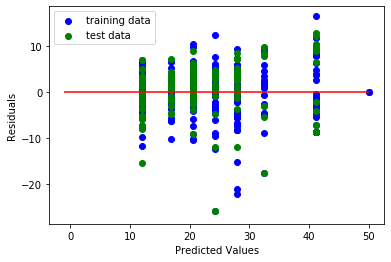

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(gs.predict(X_train),error_train, c="b", label="training data")
plt.scatter(gs.predict(X_test),error_test, c="g", label="test data")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.legend(loc="upper left")
plt.hlines(y=0, xmin=-1, xmax=50, color="r")
plt.show()

## Random forest

LET'USE THE DECISION TREE REGRESSOR ON THE ENTIRE DATASET NOW

In [14]:
#Boston Housing Dataset: Load the boston dataset.
from sklearn.datasets import load_boston
boston = load_boston()

#Creating feature and target arrays
X, y = boston.data, boston.target
columns = boston.feature_names

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.3,
                                                    random_state=42)

#DEFINE YOUR REGRESSOR and THE PARAMETERS GRID
from sklearn.ensemble import RandomForestRegressor 
import numpy as np

regressor = RandomForestRegressor()
parameters = {"n_estimators":[5,10,100], "criterion": ['mse'], 
              "min_samples_leaf": [0.1,0.3], "random_state" : [42]}

#DEFINE YOUR GRIDSEARCH 
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(regressor, parameters, cv=3) #with no params it reduces to a CV

gs = gs.fit(X_train,y_train)

#summarize the results of your GRIDSEARCH
print('***GRIDSEARCH RESULTS***')
print("Best score: %f using %s" % (gs.best_score_, gs.best_params_))
means = gs.cv_results_['mean_test_score']
stds = gs.cv_results_['std_test_score']
params = gs.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

#Returns the coefficient of determination R^2 of the prediction.
#Explained variance score: 1 is perfect prediction
gs.score(X_test, y_test)

***GRIDSEARCH RESULTS***
Best score: 0.686084 using {'criterion': 'mse', 'min_samples_leaf': 0.1, 'n_estimators': 100, 'random_state': 42}
0.659203 (0.015599) with: {'criterion': 'mse', 'min_samples_leaf': 0.1, 'n_estimators': 5, 'random_state': 42}
0.676779 (0.017731) with: {'criterion': 'mse', 'min_samples_leaf': 0.1, 'n_estimators': 10, 'random_state': 42}
0.686084 (0.013942) with: {'criterion': 'mse', 'min_samples_leaf': 0.1, 'n_estimators': 100, 'random_state': 42}
0.407515 (0.070729) with: {'criterion': 'mse', 'min_samples_leaf': 0.3, 'n_estimators': 5, 'random_state': 42}
0.420101 (0.048211) with: {'criterion': 'mse', 'min_samples_leaf': 0.3, 'n_estimators': 10, 'random_state': 42}
0.415838 (0.042392) with: {'criterion': 'mse', 'min_samples_leaf': 0.3, 'n_estimators': 100, 'random_state': 42}


0.6933478940818735

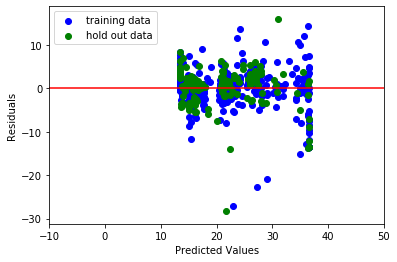

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(gs.predict(X_train),gs.predict(X_train)-y_train, c="b", label="training data")
plt.scatter(gs.predict(X_test),gs.predict(X_test)-y_test, c="g", label="hold out data")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.legend(loc="upper left")
plt.hlines(y=0, xmin=-10, xmax=50, color="r")
plt.xlim([-10,50])
plt.show()

In [16]:
from sklearn import metrics

print("MAE train: ", metrics.mean_absolute_error(y_train, gs.predict(X_train))) 
print("MSE train: ",metrics.mean_squared_error(y_train, gs.predict(X_train)))
print("RMSE train: ",np.sqrt(metrics.mean_squared_error(y_train, gs.predict(X_train))))
print("r2: ",np.sqrt(metrics.r2_score(y_train, gs.predict(X_train))))

print("MAE test: ", metrics.mean_absolute_error(y_test, gs.predict(X_test))) 
print("MSE test: ",metrics.mean_squared_error(y_test, gs.predict(X_test)))
print("RMSE test: ",np.sqrt(metrics.mean_squared_error(y_test, gs.predict(X_test))))
print("r2: ",np.sqrt(metrics.r2_score(y_test, gs.predict(X_test))))

MAE train:  3.263103683108045
MSE train:  23.819833988719022
RMSE train:  4.8805567293823175
r2:  0.8538158042661816
MAE test:  3.305980422839722
MSE test:  22.849597674365047
RMSE test:  4.780125278103603
r2:  0.8326751431872297


In [17]:
from sklearn import tree
r = tree.export_text(gs.best_estimator_.estimators_[40],feature_names=columns.tolist(), max_depth=3)
print(r)


|--- LSTAT <= 5.94
|   |--- value: [36.74]
|--- LSTAT >  5.94
|   |--- LSTAT <= 14.99
|   |   |--- RM <= 6.43
|   |   |   |--- value: [21.45]
|   |   |--- RM >  6.43
|   |   |   |--- value: [26.99]
|   |--- LSTAT >  14.99
|   |   |--- value: [14.27]



In [18]:
# We can export as a figure but we must install graphviz https://graphviz.gitlab.io/download/

# Install a conda package in the current Jupyter kernel
#import sys
#!conda install --yes --prefix {sys.prefix} graphviz
#!{sys.executable} -m pip install graphviz

from sklearn import tree
tree.export_graphviz(gs.best_estimator_.estimators_[0], out_file='tree_from_forest.dot',feature_names=columns.tolist(),max_depth=4)

In [19]:
!dot -Tpng tree_from_forest.dot -o tree_from_forest.png -Gdpi=600

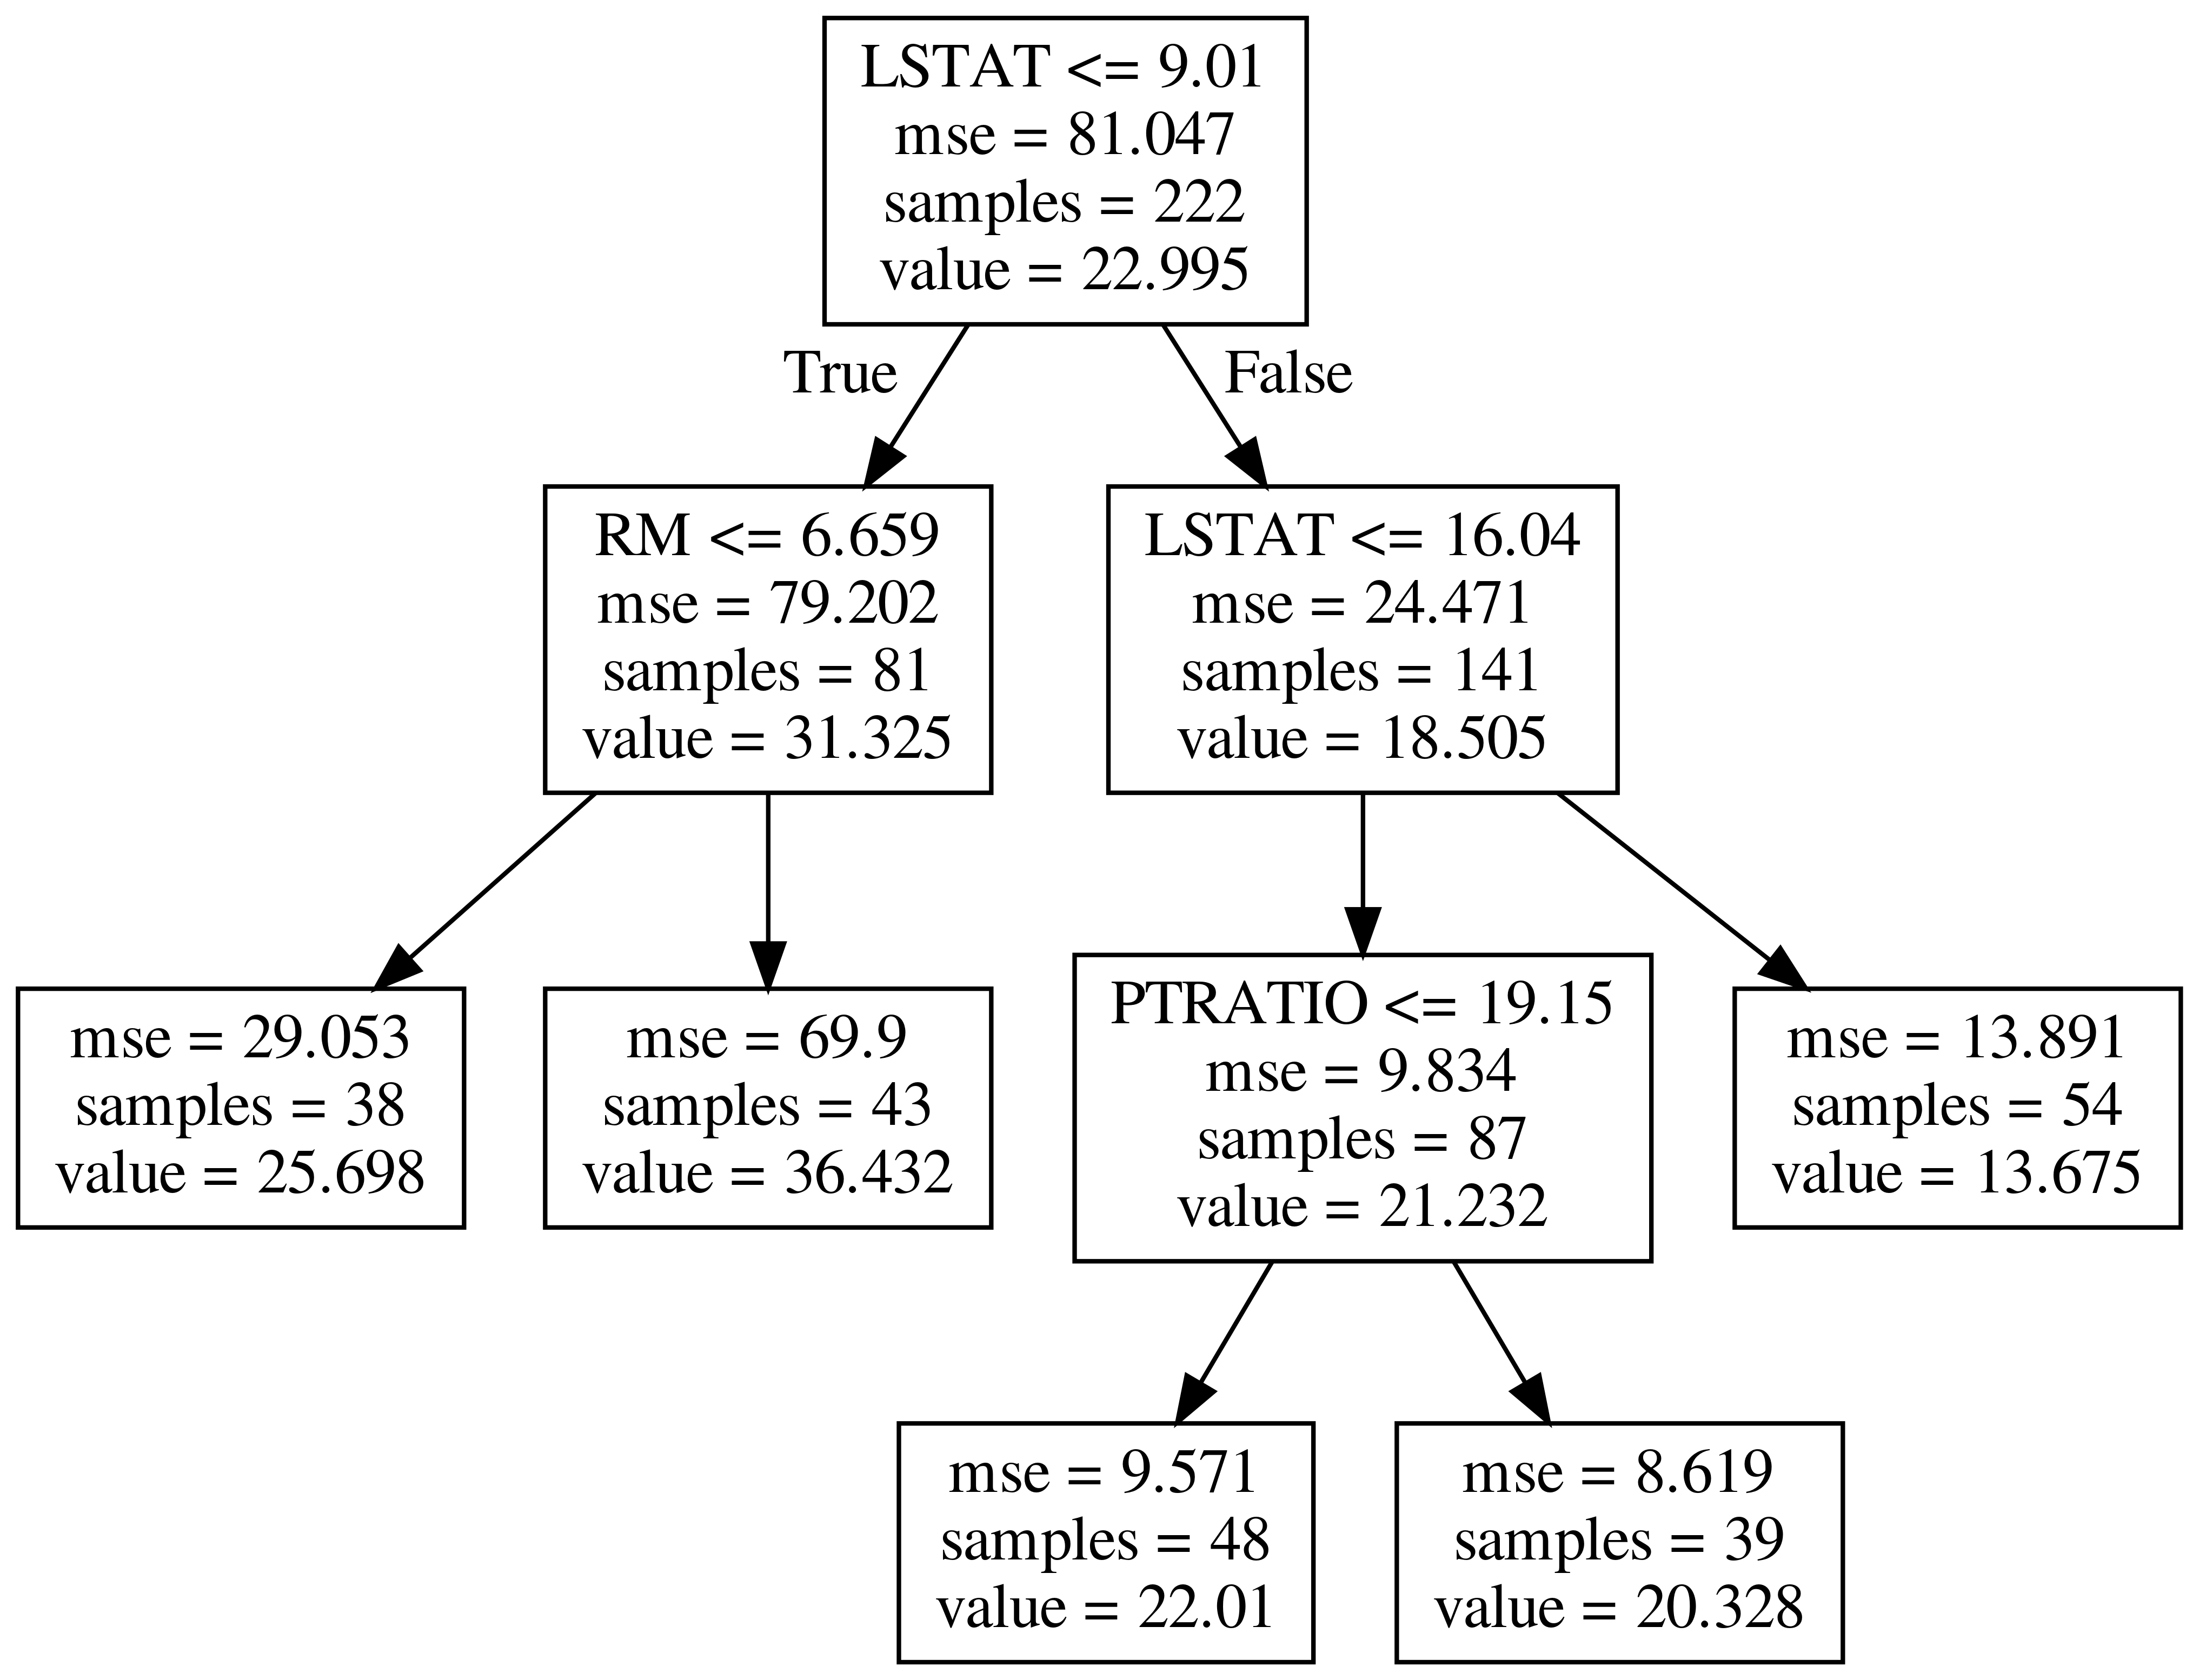

In [20]:
from IPython.display import Image
Image(filename = 'tree_from_forest.png')